# Решающие деревья

При подготовке использовались <a href="https://github.com/esokolov/ml-course-hse/blob/master/2017-fall/seminars/sem07-trees.ipynb">материалы</a> Евгения Соколова

# Визуализация в решающих деревьях

**Примечание:**

Для данного ноутбука понадобятся pydotplus (питоновский модуль) и GraphViz

* На macOS это решается так:

 * sudo pip install pydotplus
 * brew install graphviz

* В linux должно работать то же самое с заменой brew на sudo apt-get

* В windows нужно сначала установить graphviz отсюда: http://www.graphviz.org/Download_windows.php
 * Затем добавить путь к папке bin в PATH (например, "C:\libs\Graphviz2.38\bin")
 * После чего выполнить pip install pydotplus

In [1]:
import pydotplus 
import numpy as np
import pandas as pd

from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## FOR HAPPY WINDOWS USERS
import os
GRAPHVIZ_INSTALL_BIN_DIR = r'C:/libs/graphviz/bin/'
os.environ["PATH"] += os.pathsep + GRAPHVIZ_INSTALL_BIN_DIR

# Ирисы Фишера

In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Организуем данные в виде таблицы

In [3]:
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['target'] = iris.target

In [4]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Строим дерево с помощью sklearn на подвыборке

In [5]:
iris_sample = iris_data.sample(n = 13, random_state = 111)

In [6]:
iris_sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
39,5.1,3.4,1.5,0.2,0
26,5.0,3.4,1.6,0.4,0
109,7.2,3.6,6.1,2.5,2
123,6.3,2.7,4.9,1.8,2
77,6.7,3.0,5.0,1.7,1
24,4.8,3.4,1.9,0.2,0
0,5.1,3.5,1.4,0.2,0
139,6.9,3.1,5.4,2.1,2
144,6.7,3.3,5.7,2.5,2
56,6.3,3.3,4.7,1.6,1


In [7]:
model = tree.DecisionTreeClassifier()
model.fit(iris_sample.iloc[:, :-1], iris_sample.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
dot_data = tree.export_graphviz(
    model, out_file="small_tree.out", 
    feature_names=iris.feature_names, class_names=iris.target_names, 
    filled=True, rounded=True, special_characters=True,
)

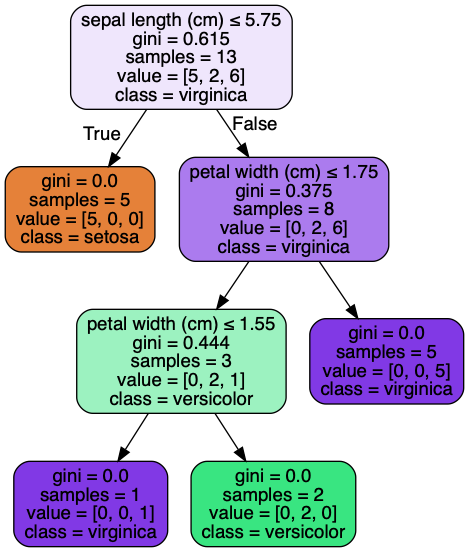

In [9]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())

## А теперь повторим для большого набора данных

In [10]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
iris_data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [12]:
model.fit(iris_data.iloc[:, :-1], iris_data.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
dot_data = tree.export_graphviz(
    model, out_file="big_tree.out",
    feature_names=iris.feature_names, class_names=iris.target_names,
    filled=True, rounded=True, special_characters=True,
)

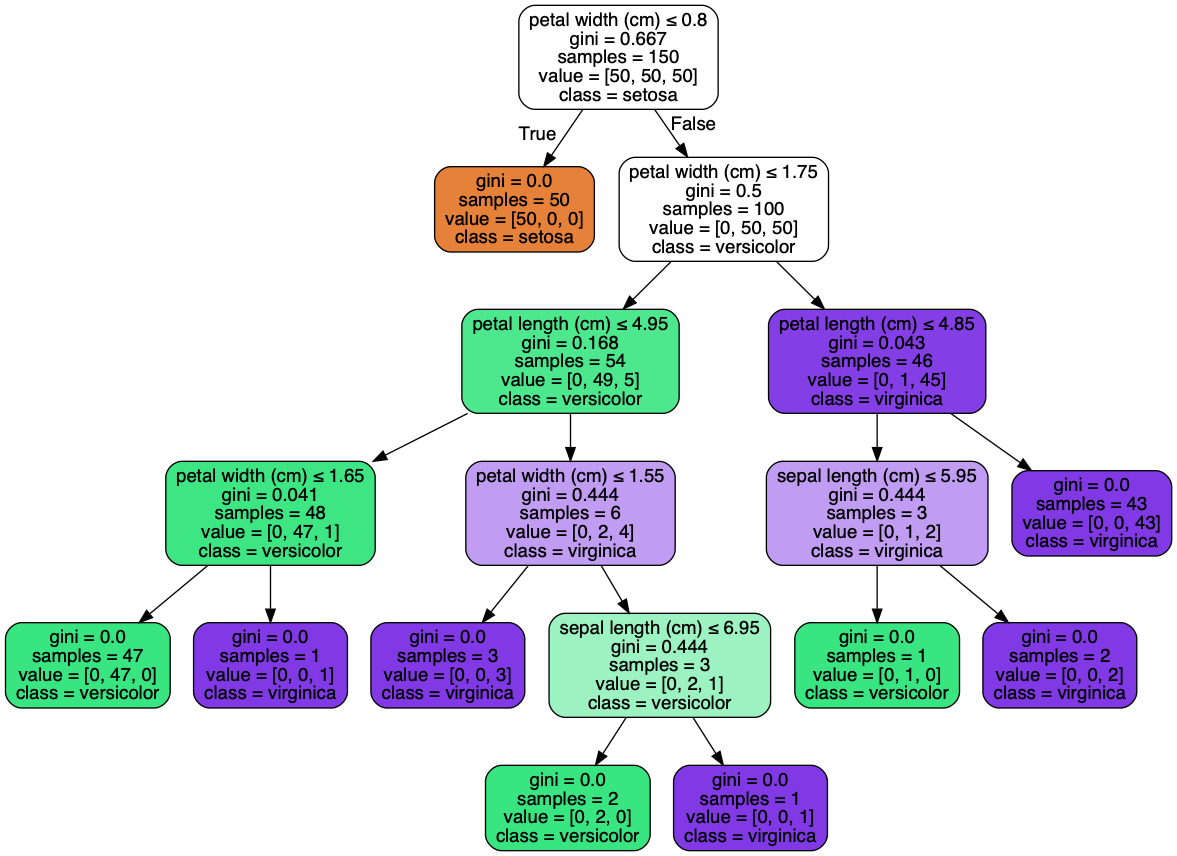

In [14]:
graph = pydotplus.graphviz.graph_from_dot_file("big_tree.out")  
Image(graph.create_png())  

## Оценим качество

In [15]:
train_data, test_data, train_target, test_target = train_test_split(
    iris_data.iloc[:, :-1], iris_data.target, test_size = 0.2,
)

In [16]:
model.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
test_predictions = model.predict(test_data)

In [18]:
print(test_predictions)

[0 2 0 1 0 1 2 0 2 0 1 2 2 1 0 2 2 1 2 0 0 2 2 1 1 1 1 0 0 2]


In [19]:
print(test_target.values)

[0 2 0 1 0 1 1 0 2 0 1 2 2 1 0 2 2 1 2 0 0 2 2 1 1 1 1 0 0 2]


In [20]:
print(accuracy_score(test_target, test_predictions))

0.9666666666666667


In [21]:
train_predictions = model.predict(train_data)

In [22]:
print(accuracy_score(train_target, train_predictions))

1.0


In [23]:
print(classification_report(test_target, test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [24]:
dot_data = tree.export_graphviz(
    model, out_file="tree.out",
    feature_names=iris.feature_names, class_names=iris.target_names, 
    filled=True, rounded=True, special_characters=True,
)

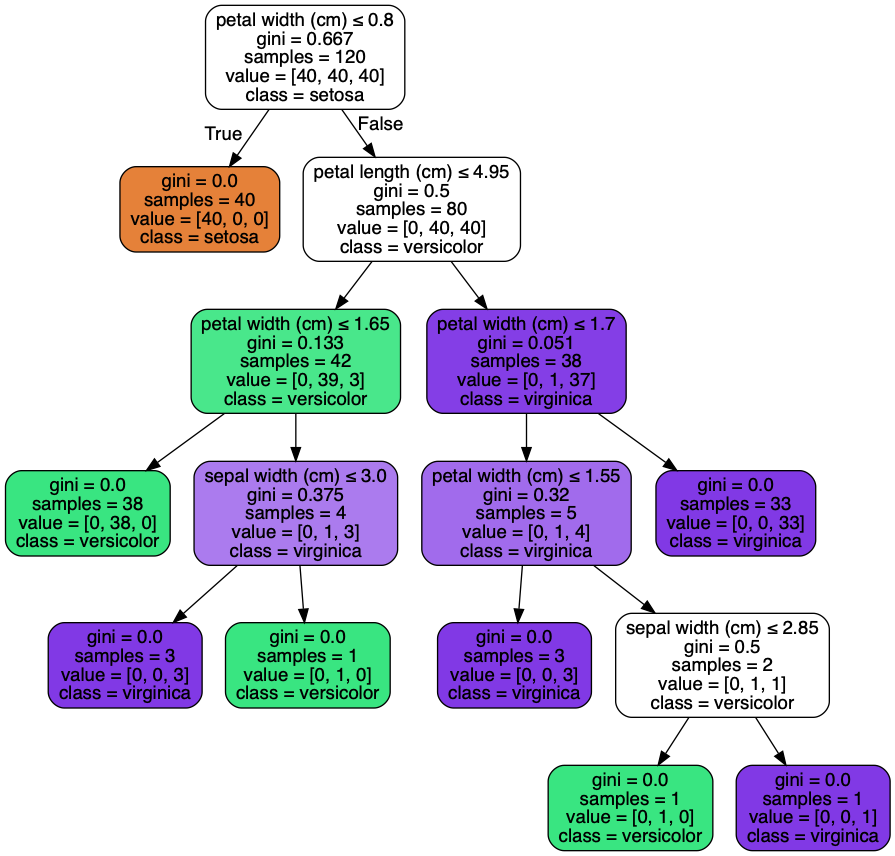

In [25]:
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())  

## Исследуем "устойчивость" модели

**Вариант 1:** деревья, построенные на немного отличающихся подмножествах обучающей выборки

См. пункт 2 в списке недостатков деревьев в документации sklearn: http://scikit-learn.org/stable/modules/tree.html

In [26]:
model = tree.DecisionTreeClassifier(max_depth=4)
print(len(train_data))

120


Построим два решающих дерева: одно выкинув из обучающей выборки diff последних примеров, другое - выкинув из нее diff первых примеров.

При diff = 10 (8,3% выборки) структура дерева такая же, при diff = 20 (16,6%) дерево уже выглядит по-другому и, кроме того, есть различия даже в выборе признака в одном из верхних сплитов

In [27]:
diff = 20

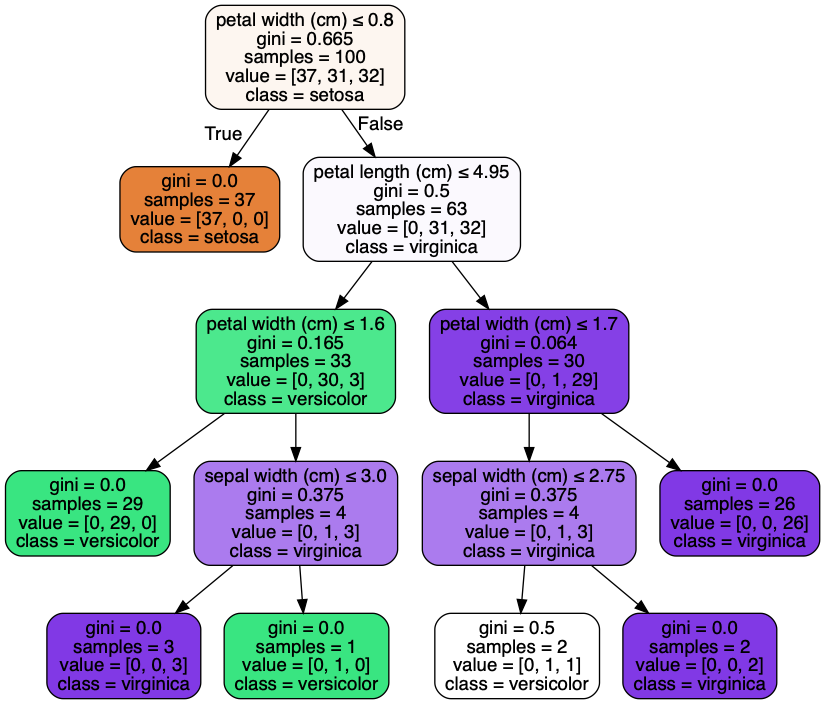

In [28]:
model.fit(train_data[:-diff], train_target[:-diff])
filename = "first_tree.out"
dot_data = tree.export_graphviz(
    model, out_file=filename, 
    feature_names=iris.feature_names, class_names=iris.target_names,
    filled=True, rounded=True, special_characters=True,
)
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

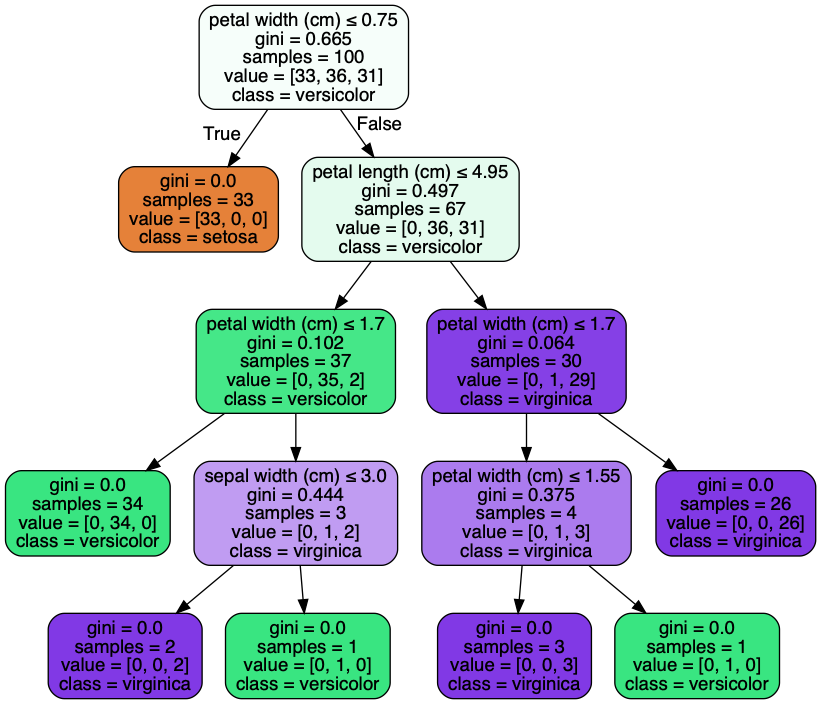

In [29]:
model.fit(train_data[diff:], train_target[diff:])
filename = "first_tree.out"
dot_data = tree.export_graphviz(
    model, out_file=filename, 
    feature_names=iris.feature_names, class_names=iris.target_names,
    filled=True, rounded=True, special_characters=True,
)
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

# Диабетики

In [30]:
from sklearn.datasets import load_diabetes

In [31]:
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

## Просто построим регрессионное дерево

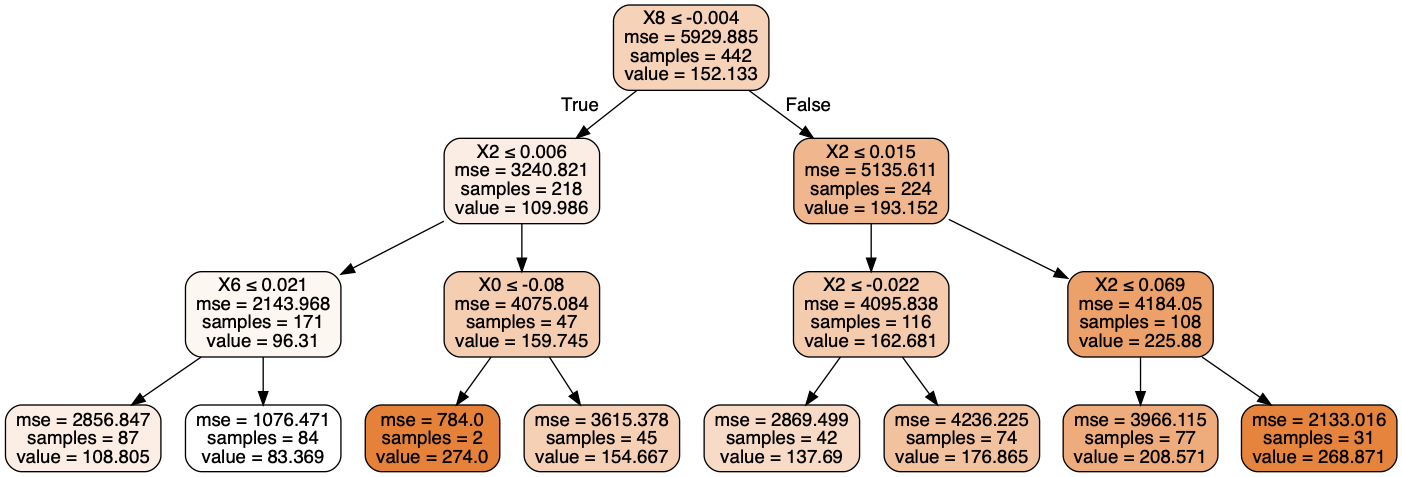

In [32]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data, diabetes.target)
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(
    model, out_file=filename, 
    filled=True, rounded=True, special_characters=True,
) 
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

## Удалим часть выборки (эффект такой же как в классификации)

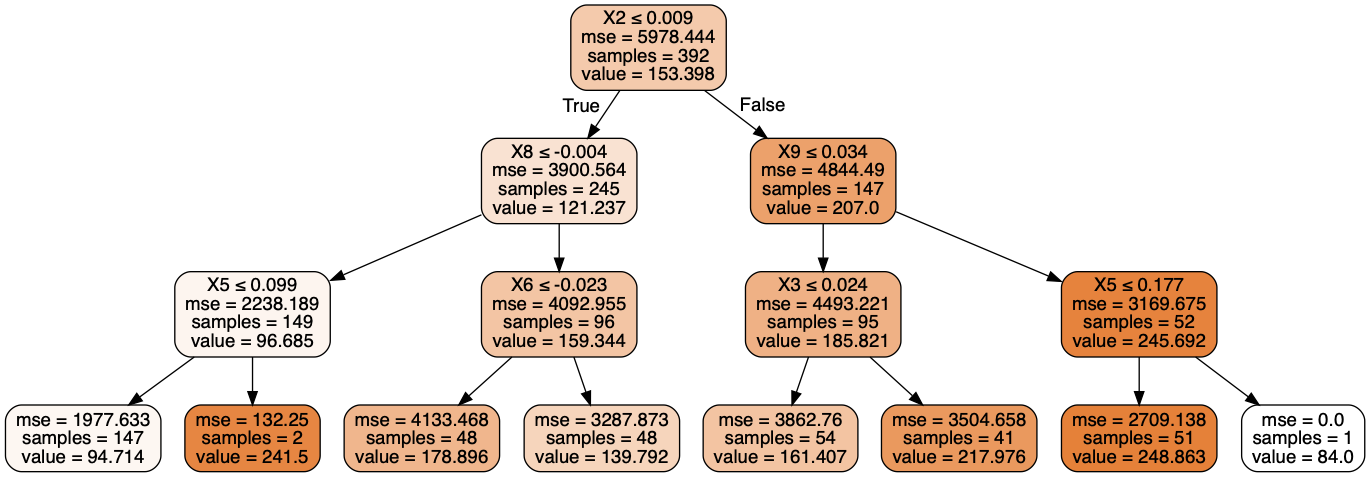

In [33]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data[50:], diabetes.target[50:])
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(
    model, out_file=filename, 
    filled=True, rounded=True, special_characters=True,
)
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

Теперь удалим немножко выборки (тогда будет почти исходное дерево)

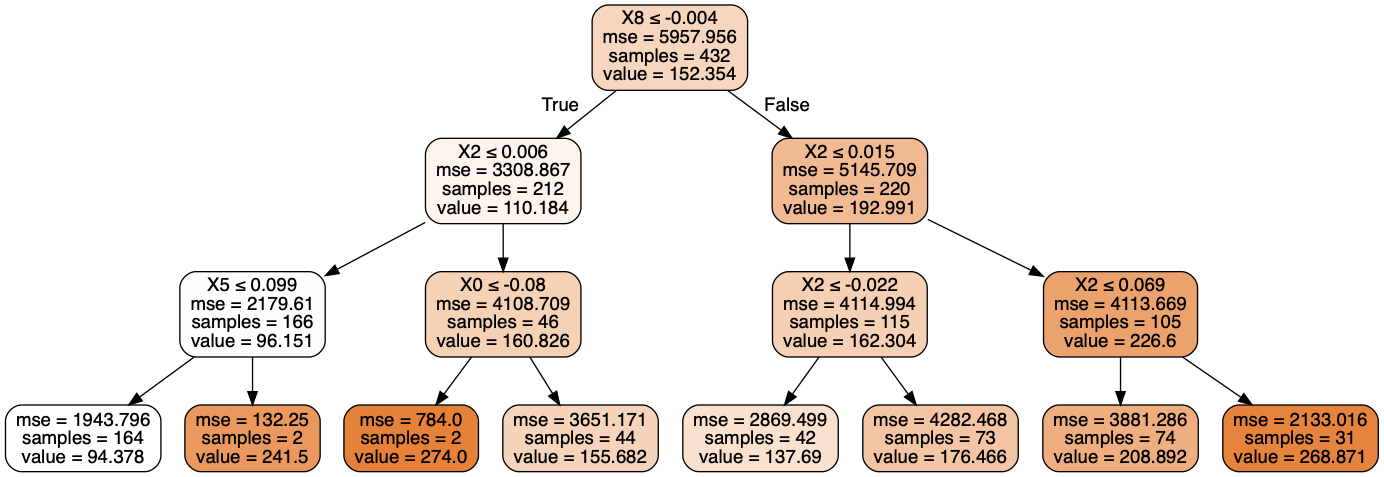

In [34]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data[10:], diabetes.target[10:])
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(
    model, out_file=filename, 
    filled=True, rounded=True, special_characters=True,
)
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

## Добавим выбросы - ответы первых 10 точек заменим на случайные (дерево изменится)

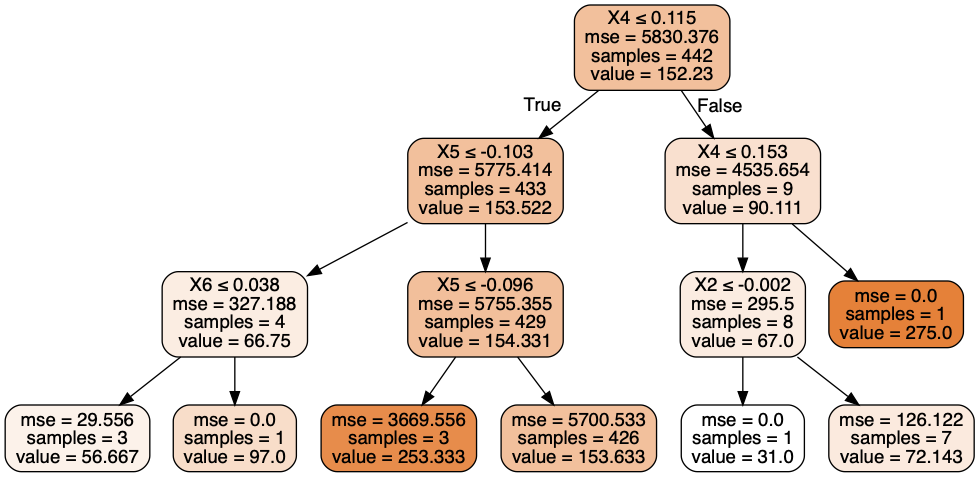

In [35]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data, list(diabetes.target[10:]) + list(np.random.normal(loc=150, scale=20, size=10)))
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(
    model, out_file=filename, 
    filled=True, rounded=True, special_characters=True,
)
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

## Увеличим дисперсию шума (при небольшом увеличении дерево особо не поменялось)

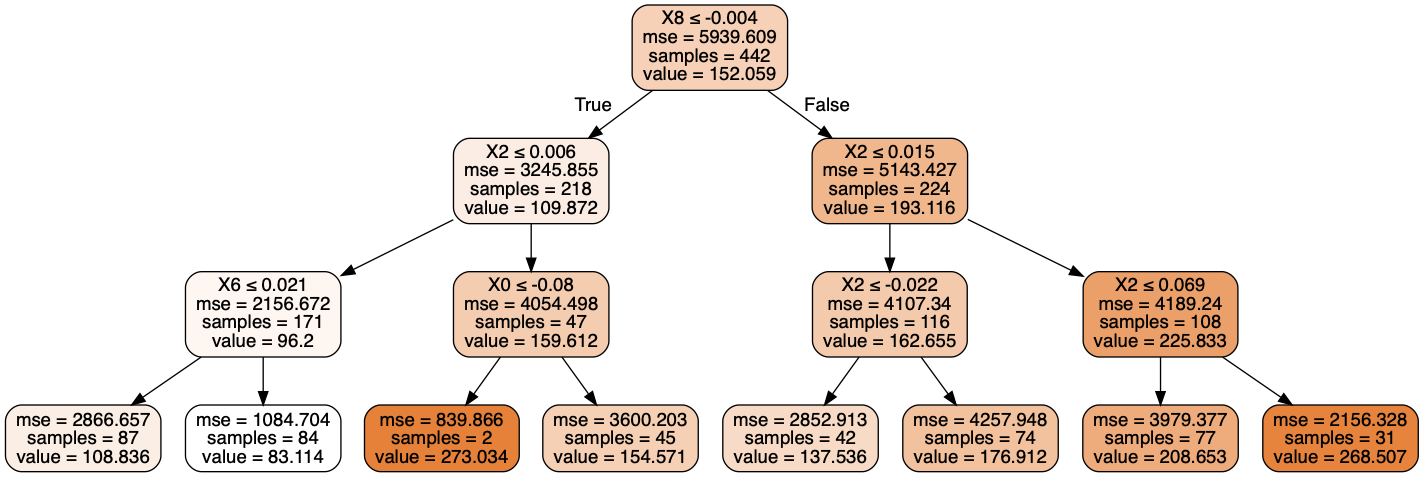

In [36]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data, diabetes.target + np.random.normal(scale=1, size=len(diabetes.target)))
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(
    model, out_file=filename, 
    filled=True, rounded=True, special_characters=True,
)
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

## Увеличим дисперcию более существенно (дерево конечно меняется, но сильных изменений не по-прежнему происходит)

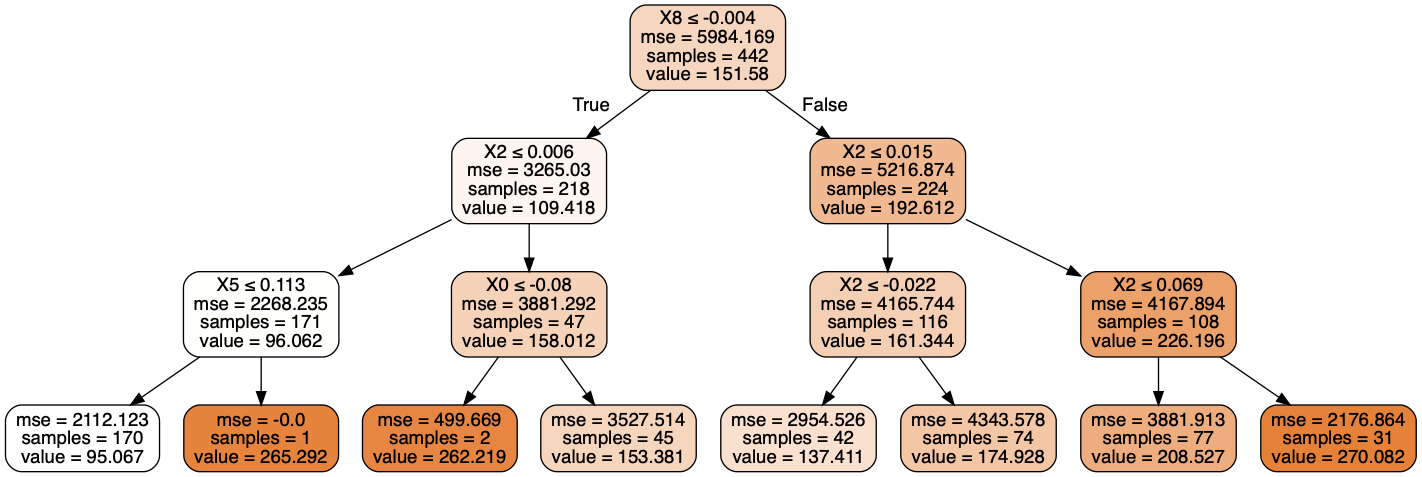

In [37]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data, diabetes.target + np.random.normal(scale=10, size=len(diabetes.target)))
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(
    model, out_file=filename, 
    filled=True, rounded=True, special_characters=True,
)
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

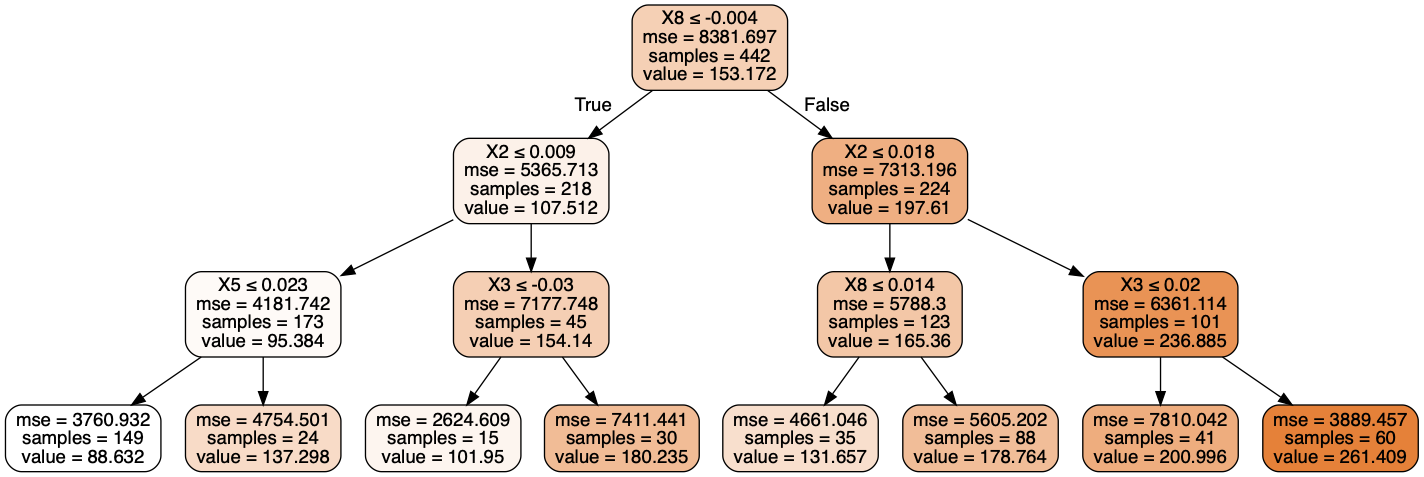

In [38]:
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(diabetes.data, diabetes.target + np.random.normal(scale=50, size=len(diabetes.target)))
filename = "diabetes_tree.out"
dot_data = tree.export_graphviz(
    model, out_file=filename, 
    filled=True, rounded=True, special_characters=True,
)
graph = pydotplus.graphviz.graph_from_dot_file(filename)  
Image(graph.create_png())  

# Преимущества и Недостатки решающих деревьев:

**Преимущества**
 * хорошо интерпретируются
 * легко обобщаются для регрессии и классификации
 * допускаются разнотипные данные
 
**Недостатки**
 * Сравнение с линейными алгоритмами на линейно разделимой выборке - фиаско
 * Переобучение
 * Неустойчивость к шуму, составу выборки, критерию
 
**Способы устранения недостатков**
 * прунинг (усечение)
 * композиции (леса) деревьев

#### Pruning

<img src='img/pruning.png' Width=800>